In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as spo

In [2]:
def f(X):
    """Given a scalar X, return some value (a real number)"""
    Y = (X - 1.5)**2 + 0.5
    print("X = {0}, Y = {1}".format(X, Y))
    return Y

In [3]:
def test_run():
    Xguess = 2.0
    min_result = spo.minimize(f, Xguess, method="SLSQP", options={"disp": True})
    print("Minina found at:")
    print("X = {0}, Y = {1}".format(min_result.x, min_result.fun))
    print("Number of iteration: {0}".format(min_result.nit))
    
    
    Xplot = np.linspace(0.5, 2.5, 21)
    Yplot = f(Xplot)
    plt.plot(Xplot, Yplot)
    plt.plot(min_result.x, min_result.fun, 'ro')
    plt.title('Minina of an object function')
    plt.show()
    plt.close()

X = [ 2.], Y = [ 0.75]
X = [ 2.], Y = [ 0.75]
X = [ 2.00000001], Y = [ 0.75000001]
X = [ 0.99999999], Y = [ 0.75000001]
X = [ 1.5], Y = [ 0.5]
X = [ 1.5], Y = [ 0.5]
X = [ 1.50000001], Y = [ 0.5]
Optimization terminated successfully.    (Exit mode 0)
            Current function value: [ 0.5]
            Iterations: 2
            Function evaluations: 7
            Gradient evaluations: 2
Minina found at:
X = [ 1.5], Y = [ 0.5]
Number of iteration: 2
X = [ 0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9
  2.   2.1  2.2  2.3  2.4  2.5], Y = [ 1.5   1.31  1.14  0.99  0.86  0.75  0.66  0.59  0.54  0.51  0.5   0.51
  0.54  0.59  0.66  0.75  0.86  0.99  1.14  1.31  1.5 ]


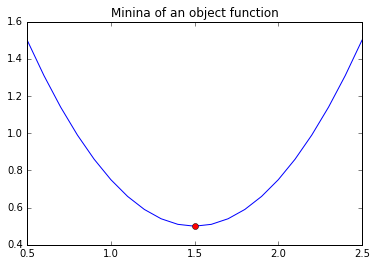

In [4]:
if __name__ == "__main__":
    test_run()

In [5]:
def error(line, data):
    """
    Compute error between given line model and observed data

    Parameters:

    line: tuple/list/array (C0, C1) where C0 is slope and C1 is Y-intercept
    data: 2D array where each row is a point (x , y)

    Returns error as a single real value
    """

    err = np.sum((data[:, 1] - (line[0] * data[:, 0] + line[1])) **2)
    return err

In [6]:
def error_poly(poly, data):
    """
    Compute error between given polynomial and observed data

    Parameters:

    poly: np.poly1d or equivalent polynomial coefficients
    data: 2D array where each row is a point (x , y)

    Returns error as a single real value
    """
    err = np.sum((data[:, 1] - np.polyval(poly, data[:, 0])) ** 2)
    return err

In [7]:
def run():
    l_orig = np.float32([4, 2])
    print('Original line: C0 = {0}, C1 = {1}'.format(l_orig[0], l_orig[1]))
    Xorig = np.linspace(0, 10, 21)
    Yorig = l_orig[0] * Xorig + l_orig[1]
    plt.plot(Xorig, Yorig, "b--", linewidth=2.0, label="Original line")

    #Generate noisy data points
    noise_sigma = 3.0
    noise = np.random.normal(0, noise_sigma, Yorig.shape)
    data = np.asarray([Xorig, Yorig + noise]).T
    plt.plot(data[:, 0], data[:, 1], 'go', label="Data points")
    plt.show()

In [8]:
def fit_line(data, error_func):
    """
    Fit a line to given data, using a supplied error function

    Parameters:
    data: 2D array where each row is a point (X0, Y)
    error_func: function that computes the error between a line and observed data
    
    Returns line that minimizes the error function
    """
    #Generate initial guess for line model
    l = np.float32([0, np.mean(data[:, 1])])
    
    #Plot intial guess (optional)
    x_ends = np.float32([-5, 5])
    plt.plot(x_ends, l[0] * x_ends + l[1], 'm--', linewidth=2.0, label="Initial guess")
    plt.show()

    result = spo.minimize(error_func, l , args=(data, ), method='SLSQP', options={'disc': True})
    return result.x

In [10]:
def fit_poly(data, error_func, degree=3):
    """
    Fit a polynial to given data, using a supplied error function

    Parameters:
    data: 2D array where each row is a point (X0, Y)
    error_func: function that computes the error between a line and observed data
    
    Returns polynomial that minimizes the error function
    """
    #Generate initial guess for polynomial model
    guess = np.poly1d(np.ones(degree+1, dtype=np.float32))
                      
    #Plot intial guess (optional)
    x = np.linspace(-5, 5, 21)
    plt.plot(x, np.polyval(guess, x), 'm--', linewidth=2.0, label="Initial guess")
    plt.show()

    result = spo.minimize(error_func, guess, args=(data, ), method='SLSQP', options={'disc': True})
    return np.poly1d(result.x)

Original line: C0 = 4.0, C1 = 2.0


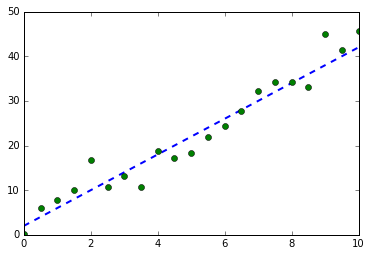

In [11]:
if __name__ == "__main__":
    run()